In [1]:
import DQN_components as agent_factory
from DQN_components.plotter import plot_trend
import enviroment

2024-10-16 16:27:56.367918: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 16:27:56.375605: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 16:27:56.399876: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 16:27:56.440846: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 16:27:56.451939: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 16:27:56.481141: I tensorflow/core/platform/cpu_feature_gu

pygame 2.6.0 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Snake è risolto con Approximate Q-learning tramite neural network

Rappresentazione di stato semplificata con soli 11 valori

In [2]:
env = enviroment.LinearStateSnakeGame(visual=False)

Game: 100, Epsilon: 0.000000, Score: 4, Record: 18, Step eseguiti: 14048. 

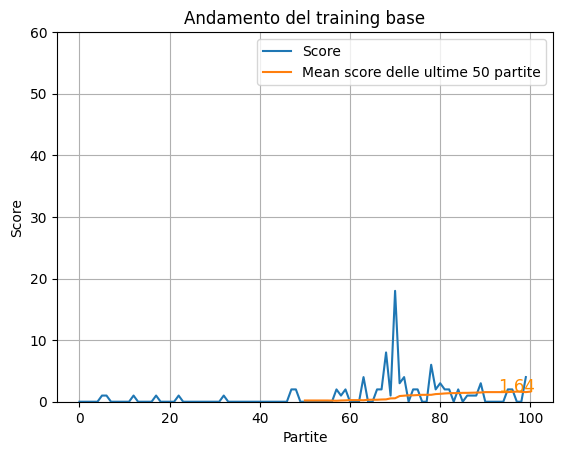

In [3]:
agent = agent_factory.Agent(enviroment=env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=env.state_shape, n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=500)
plot_trend(train_result, extra_title="")

# Prioritized Experience Replay

Game: 500, Epsilon: 0.000000, Score: 29, Record: 54, Step eseguiti: 82965. 

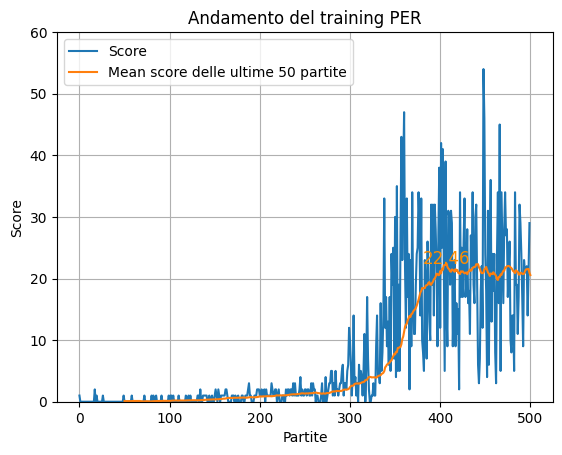

In [4]:
agent_per = agent_factory.Agent_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3)
train_result_per = agent_per.train_agent(N_GAME=500)
plot_trend(train_result_per, extra_title="PER")

# Double DQN

Game: 500, Epsilon: 0.000000, Score: 30, Record: 56, Step eseguiti: 83691. 

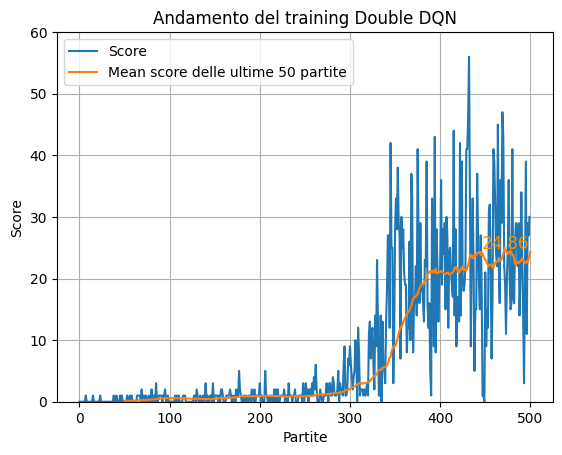

In [5]:
agent_doubledqn = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3)
train_result_doubledqn = agent_doubledqn.train_agent(N_GAME=500)
plot_trend(train_result_doubledqn, extra_title="Double DQN")

# PER + DDQN

epsilon greedy policy

In [ ]:
agent_ddqn_per_eps = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3)
train_result_ddqn_per_eps = agent_ddqn_per_eps.train_agent(N_GAME=500)
plot_trend(train_result_ddqn_per_eps, extra_title="PER + DDQN e-greedy")

Game: 365, Epsilon: 0.000000, Score: 2, Record: 41, Step eseguiti: 35802.  

softmax policy

Game: 500, Epsilon: 0.000000, Score: 22, Record: 44, Step eseguiti: 144698. 

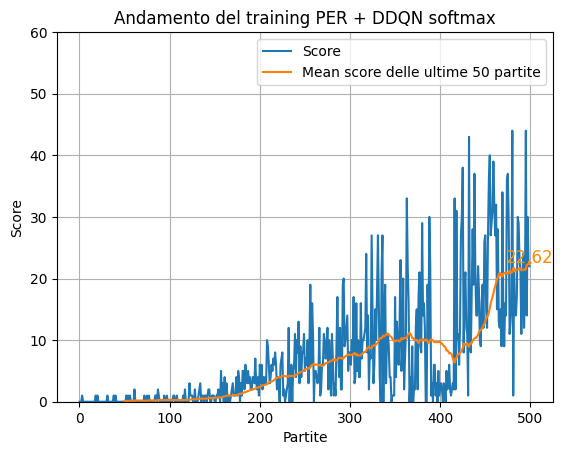

In [6]:
agent_ddqn_per_smx = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3, eps_greedy=False)
train_result_ddqn_per_smx = agent_ddqn_per_smx.train_agent(N_GAME=500)
plot_trend(train_result_ddqn_per_smx, extra_title="PER + DDQN softmax")

# Rappresentazione di stato più complessa: una matrice 7x7 al cui centro la testa di snake.

In [ ]:
env = enviroment.MatrixStateSnakeGame()
agent = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[40], n_actions=4, eps_greedy=True)
agent = agent.train_agent(N_GAME=500)
plot_trend(train_result_ddqn_per_smx, extra_title="")